### Load Packages

In [1]:
# Install Packages
%pip install pandas numpy matplotlib seaborn

# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

Note: you may need to restart the kernel to use updated packages.


### Load Dataset

In [2]:
# Load into a dataframe
dish_df = pd.read_csv('data/raw/Dish.csv')

# Load the Menu Item dataset
menuitem_df = pd.read_csv('data/raw/MenuItem.csv')

# Display the first few rows of the dataframe
display(dish_df.head())

# Display the data types of the columns
print(dish_df.dtypes)

# Display summary statistics of the dataframe
display(dish_df.describe())

,id,name,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
0,1,Consomme printaniere royal,NaN,8,8,1897,1927,0.20,0.4
1,2,Chicken gumbo,NaN,111,117,1895,1960,0.10,0.8
2,3,Tomato aux croutons,NaN,13,13,1893,1917,0.25,0.4
3,4,Onion au gratin,NaN,41,41,1900,1971,0.25,1.0
4,5,St. Emilion,NaN,66,68,1881,1981,0.00,18.0


id                  int64
name               object
description       float64
menus_appeared      int64
times_appeared      int64
first_appeared      int64
last_appeared       int64
lowest_price      float64
highest_price     float64
dtype: object


,id,description,menus_appeared,times_appeared,first_appeared,last_appeared,lowest_price,highest_price
count,423397.000000,0.0,423397.000000,423397.000000,423397.000000,423397.000000,394297.000000,394297.000000
mean,264456.594900,NaN,3.060489,3.146794,1675.514555,1679.299738,0.965265,1.603875
std,150489.070889,NaN,27.818178,29.962122,651.321461,651.934580,6.714564,12.696274
min,1.000000,NaN,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000
25%,132374.000000,NaN,1.000000,1.000000,1900.000000,1900.000000,0.000000,0.000000
50%,269636.000000,NaN,1.000000,1.000000,1914.000000,1917.000000,0.000000,0.000000
75%,397135.000000,NaN,1.000000,1.000000,1949.000000,1955.000000,0.400000,0.600000
max,515677.000000,NaN,7740.000000,8484.000000,2928.000000,2928.000000,1035.000000,3050.000000


#### Analyze IC Violations Between the Dish dataset and the MenuItem Dataset
##### Section 1

In [3]:
# Find dishes that don't exist in MenuItem table based on the dish ID
dish_ids = set(dish_df['id'])
menuitem_dish_ids = set(menuitem_df['dish_id'])
violating_dish_ids = dish_ids - menuitem_dish_ids

print(f"Total dishes: {len(dish_ids)}")
print(f"Violating dishes: {len(violating_dish_ids)}")
print(f"Dishes not linked to menu items: {len(violating_dish_ids)} ({len(violating_dish_ids)/len(dish_ids)*100}%)")

Total dishes: 423397
Violating dishes: 9262
Dishes not linked to menu items: 9262 (2.18754502275642%)


#### Invalid Date Values for the first_appeared and last_appeared columns
##### Section 2

First Appeared Check Results:
    Future years (>2025): 11
    Extreme years (<1500): 55492
Last Appeared Check Results:
    Future years (>2025): 179
    Extreme years (<1500): 55321
Logical Issues Check Results:
    First > Last: 6


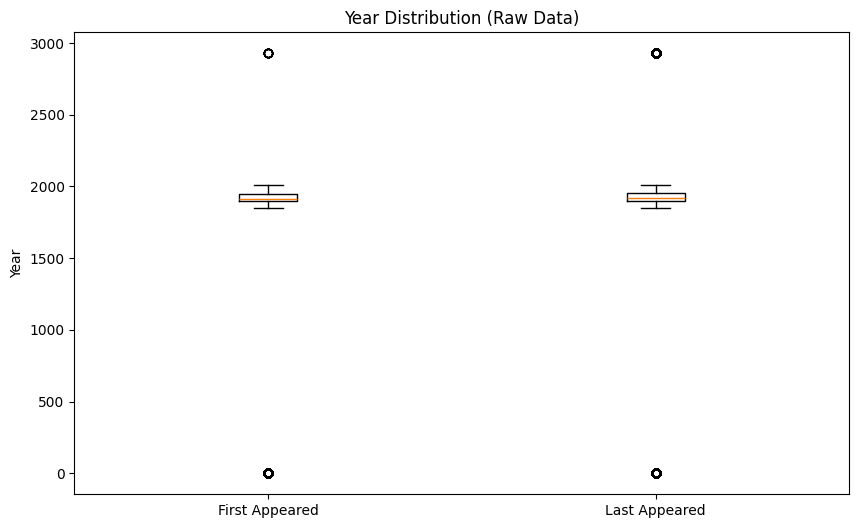

In [4]:
current_year = 2025 # the last_appeared should not be greater than this
min_valid_year = 1500 # the first_appeared should not be less than this - this was picked at random as the dataset description doesn't identify the first valid time

# Invalid year values
future_years_first = (dish_df['first_appeared'] > current_year).sum()
ancient_years_first = (dish_df['first_appeared'] < min_valid_year).sum()
print(f"First Appeared Check Results:")
print(f"    Future years (>{current_year}): {future_years_first}")
print(f"    Extreme years (<{min_valid_year}): {ancient_years_first}")

future_years_last = (dish_df['last_appeared'] > current_year).sum()
ancient_years_last = (dish_df['last_appeared'] < min_valid_year).sum()
print(f"Last Appeared Check Results:")
print(f"    Future years (>{current_year}): {future_years_last}")
print(f"    Extreme years (<{min_valid_year}): {ancient_years_last}")

# Show where the first appeared date is greater than the last appeared date
inconsistent_dates = (dish_df['first_appeared'] > dish_df['last_appeared']).sum()
print(f"Logical Issues Check Results:")
print(f"    First > Last: {inconsistent_dates}")

# Boxplot of first and last appeared years for understanding
plt.figure(figsize=(10, 6))
year_data = [
    dish_df['first_appeared'].dropna(),
    dish_df['last_appeared'].dropna()
]
plt.boxplot(year_data, tick_labels=['First Appeared', 'Last Appeared'])
plt.title('Year Distribution (Raw Data)')
plt.ylabel('Year')
plt.show()

#### Analyze Invalid Pricing Records
##### Section 3

Records with both prices missing: 29100
Records with lowest price missing but highest price present: 0
Records with highest price missing but lowest price present: 0
Records with both prices zero: 218014
Percentage of records with both prices zero: 51.49162606253705%


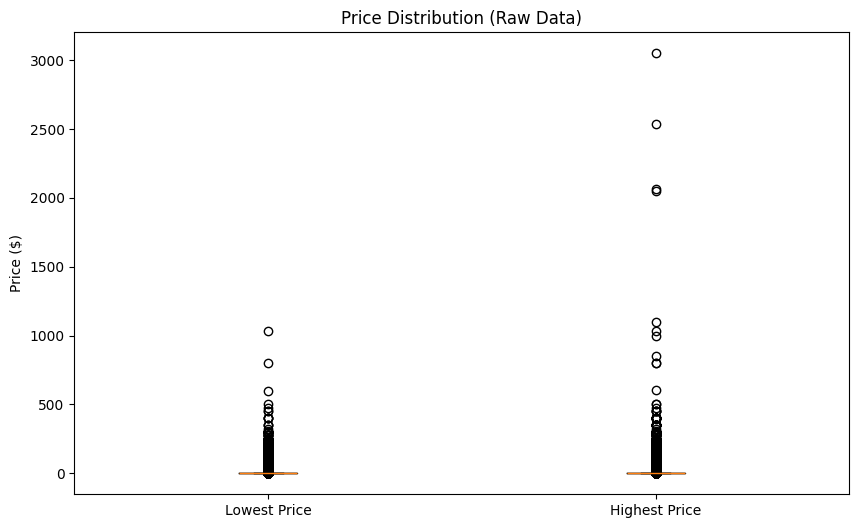

In [5]:
# Find records where both price fields are null/empty
missing_both_prices = dish_df[dish_df['lowest_price'].isnull() & dish_df['highest_price'].isnull()]
print(f"Records with both prices missing: {len(missing_both_prices)}")

# Identify records where the lowest price is null/empty but the highest price is not
missing_lowest_price = dish_df[dish_df['lowest_price'].isnull() & dish_df['highest_price'].notnull()]
print(f"Records with lowest price missing but highest price present: {len(missing_lowest_price)}")

# Identify records where the highest price is null/empty but the lowest price is not
missing_highest_price = dish_df[dish_df['highest_price'].isnull() & dish_df['lowest_price'].notnull()]
print(f"Records with highest price missing but lowest price present: {len(missing_highest_price)}")

# Identify records where both prices are zero
zero_prices = dish_df[(dish_df['lowest_price'] == 0) & (dish_df['highest_price'] == 0)]
print(f"Records with both prices zero: {len(zero_prices)}")

# Percentage of reords with both prices zero
zero_prices_percentage = (len(zero_prices) / len(dish_df)) * 100
print(f"Percentage of records with both prices zero: {zero_prices_percentage}%")

# Boxplot the distribution of lowest and highest prices
plt.figure(figsize=(10, 6))

# Need to drop na to visualize the boxplot correctly
price_data = [
    dish_df['lowest_price'].dropna(),
    dish_df['highest_price'].dropna()
]

plt.boxplot(price_data, tick_labels=['Lowest Price', 'Highest Price'])
plt.title('Price Distribution (Raw Data)')
plt.ylabel('Price ($)')
plt.show()

#### Standardize the Dish Name Column
##### Section 4

In [6]:
# Name completeness and uniqueness
total_names = len(dish_df)
unique_names = dish_df['name'].nunique()
missing_names = dish_df['name'].isnull().sum()

print(f"Name Completeness: {total_names - missing_names}/{total_names} ({((total_names - missing_names)/total_names*100)}%)")
print(f"Unique Names: {unique_names} (potential duplicates: {total_names - unique_names})")
print(f"Missing Names: {missing_names} ({(missing_names/total_names*100)}%)")

# Case standardization needs
all_upper = dish_df['name'].str.isupper().sum()
all_lower = dish_df['name'].str.islower().sum()
mixed_case = total_names - all_upper - all_lower - missing_names
print(f"All Upper Case: {all_upper}")
print(f"All Lower Case: {all_lower}")
print(f"Mixed Case: {mixed_case} (potential case standardization needed to make all lowercase)")

# Dish names that have quotes
dish_with_quotes = dish_df[dish_df['name'].str.contains('"', na=False)]
print(f"Dishes with quotes in name: {len(dish_with_quotes)}")

Name Completeness: 423397/423397 (100.0%)
Unique Names: 423363 (potential duplicates: 34)
Missing Names: 0 (0.0%)
All Upper Case: 16491
All Lower Case: 11513
Mixed Case: 395393 (potential case standardization needed to make all lowercase)
Dishes with quotes in name: 6860


#### Drop the Empty Description Column
##### Section 5

In [7]:
# Review null and empty values for the name column
total_rows = len(dish_df)
null_count = dish_df['name'].isnull().sum()
empty_count = (dish_df['name'] == '').sum()
null_percentage = (null_count / total_rows) * 100
empty_percentage = (empty_count / total_rows) * 100
print(f"Null values in 'name': {null_count} ({null_percentage}%)")
print(f"Empty values in 'name': {empty_count} ({empty_percentage}%)")


# Review null and empty values for the description column
null_count = dish_df['description'].isnull().sum()
empty_count = (dish_df['description'] == '').sum()
null_percentage = (null_count / total_rows) * 100
empty_percentage = (empty_count / total_rows) * 100
print(f"Null values in 'description': {null_count} ({null_percentage}%)")
print(f"Empty values in 'description': {empty_count} ({empty_percentage}%)")

Null values in 'name': 0 (0.0%)
Empty values in 'name': 0 (0.0%)
Null values in 'description': 423397 (100.0%)
Empty values in 'description': 0 (0.0%)


In [8]:
# Review null and empty values for numeric columns in the dataset
total_records = len(dish_df)

numeric_columns = ['id', 'first_appeared', 'last_appeared', 'lowest_price', 'highest_price', 'times_appeared']

print("Numeric Columns - Missing Data")
numeric_missing_percentages = []
for col in numeric_columns:
    missing_count = dish_df[col].isnull().sum()
    missing_pct = (missing_count / total_records) * 100
    print(f"{col}: {missing_count:,} missing ({missing_pct}%)")
    numeric_missing_percentages.append(missing_pct)

Numeric Columns - Missing Data
id: 0 missing (0.0%)
first_appeared: 0 missing (0.0%)
last_appeared: 0 missing (0.0%)
lowest_price: 29,100 missing (6.872982094818811%)
highest_price: 29,100 missing (6.872982094818811%)
times_appeared: 0 missing (0.0%)
